In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

(1797, 64)
 label : 0


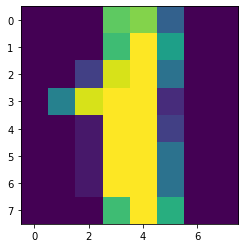

In [3]:
print(digits['data'].shape) # 1797장의 이미지 ( 8pixel x 8pixel 사이즈)
print(" label :", digits['target'][0])
plt.imshow(digits['data'][1].reshape(8, 8)) # 가로 8 세로 8, 각 원소들은 픽셀의 색상을 나타낸다.
plt.show()

In [4]:
np.unique(digits['target'], return_counts=True) # 0~9사이의 숫자가 얼마나 들어가있는지

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

In [5]:
from sklearn.model_selection import train_test_split

X, y = digits['data'], digits['target'] == 9 # y값은 9인지 확인 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [6]:
print(digits['target'].shape) # 1차원
print(len(y))
np.unique(y, return_counts=True) # 데이터 비율 9(9가 아닌 확률):1 (9일 확률) -> 목적변수가 공평하지 않고 한 쪽으로 기운 불균형 데이터셋의 경우 분류를 할 때 accuracy를 기준으로 하면 안된다. 신뢰하면 안된다. -> 90%가 False이므로 accuracy가 높게 나올 수 있다.

(1797,)
1797


(array([False,  True]), array([1617,  180], dtype=int64))

In [7]:
digits['data'][1] # 각 픽셀의 색상을 나타냄

array([ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
        9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
       15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
        0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
       16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.])

In [8]:
from sklearn.dummy import DummyClassifier
dc = DummyClassifier(strategy='most_frequent') # 가장 빈도가 높은것으로
dc.fit(X_train, y_train)
dc.score(X_test, y_test) # 89%의 정확도

0.9

In [9]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9777777777777777

In [10]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.9311111111111111

In [11]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, dc.predict(X_test)))
print(confusion_matrix(y_test, tree.predict(X_test)))
print(confusion_matrix(y_test, lr.predict(X_test)))

[[405   0]
 [ 45   0]]
[[394  11]
 [ 20  25]]
[[400   5]
 [  5  40]]


In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(recall_score(y_test, dc.predict(X_test)))
print(recall_score(y_test, tree.predict(X_test)))
print(recall_score(y_test, lr.predict(X_test)))
print("-"*20)
print(precision_score(y_test, dc.predict(X_test)))
print(precision_score(y_test, tree.predict(X_test)))
print(precision_score(y_test, lr.predict(X_test)))
print("-"*20)
print(f1_score(y_test, dc.predict(X_test))) # 조화 평균
print(f1_score(y_test, tree.predict(X_test)))
print(f1_score(y_test, lr.predict(X_test)))

0.0
0.5555555555555556
0.8888888888888888
--------------------
0.0
0.6944444444444444
0.8888888888888888
--------------------
0.0
0.6172839506172839
0.8888888888888888


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dc.predict(X_test)))
print(classification_report(y_test, tree.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))


              precision    recall  f1-score   support

       False       0.90      1.00      0.95       405
        True       0.00      0.00      0.00        45

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450

              precision    recall  f1-score   support

       False       0.95      0.97      0.96       405
        True       0.69      0.56      0.62        45

    accuracy                           0.93       450
   macro avg       0.82      0.76      0.79       450
weighted avg       0.93      0.93      0.93       450

              precision    recall  f1-score   support

       False       0.99      0.99      0.99       405
        True       0.89      0.89      0.89        45

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import mglearn
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_blobs(n_samples=(400,50), centers=2, cluster_std=[7.0, 2], random_state=42) # n_samples= 이진분류 체계 데이터 달라는 것! (불균형 데이터 셋 만들기 위해)


C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [15]:
X.shape

(450, 2)

In [16]:
print(X.shape)
print(X[:5])
print(np.unique(y, return_counts=True))

(450, 2)
[[ 9.23767508  1.24749256]
 [-2.47249173  9.34315028]
 [-3.61525291  6.02611864]
 [-0.85989572 14.41034249]
 [ 5.80773521  1.2545855 ]]
(array([0, 1]), array([400,  50], dtype=int64))


In [17]:
T = np.array([1,2,3,4,5])
bi = np.array([0,0,1,0,1])
print(T[3])
print(T[1:4])
print(T[[True, False, False, True, False]]) # true인 값만 뽑기
print(bi == 1)
print(T[bi==1])

4
[2 3 4]
[1 4]
[False False  True False  True]
[3 5]


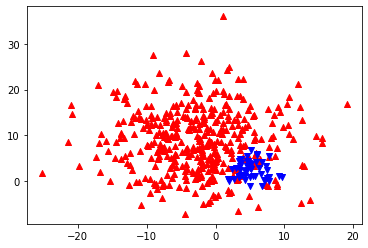

In [18]:
plt.scatter(X[y==0, 0], X[y==0,1], marker='^', color='red') # y==0인 것 열 0번째 뽑기, y==1인것 열 1번째 뽑기
plt.scatter(X[y==1, 0], X[y==1,1], marker='v', color='blue')
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

In [20]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
print(classification_report(y_test, svc.predict(X_test)))# 0을 기준 / 1을 기준으로 P,R -> 우리가 보는 것은 1을 기준

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       100
           1       0.67      0.77      0.71        13

    accuracy                           0.93       113
   macro avg       0.82      0.86      0.84       113
weighted avg       0.93      0.93      0.93       113



In [21]:
y_pred = svc.decision_function(X_test) > -0.8 # 테스트 과정이라 임의 값 줌. -0.8보다 작으면 False, -0.8보다 크면 True 판단 # 임계치 밸런스 조정은 의사결정의 문제이다. 
print(classification_report(y_test, y_pred)) # recall지수가 전 에 뽑은 것 0.77에서 1로올라감, 대신 precision이 0.67에서 0.54로 내려김 -> TN,FN은 줄어들고 FP,TP는 늘어남 
# TN FP
# FN TP

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       100
           1       0.54      1.00      0.70        13

    accuracy                           0.90       113
   macro avg       0.77      0.95      0.82       113
weighted avg       0.95      0.90      0.91       113



C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
No handles with labels found to put in legend.


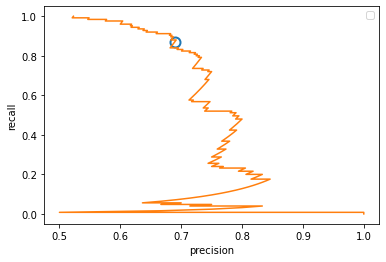

In [28]:
from sklearn.metrics import precision_recall_curve # P,R값 계산

X, y = mglearn.datasets.make_blobs(n_samples=(4000,500), centers=2, cluster_std=[7.0, 2], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test)) # 임계치 조금씩 바꿀때마다 어떻게 변하는지 보겠다. 실제값,예측값

idx = np.argmin(np.abs(thresholds))# 0에 근접한 임계값의 위치 찾기 -> 그냥 내버려둘 때 가장 최적인 점 # 동그라미 기준으로 오른쪽 : precision 얻기 위해 recall을 얼마나 줄여야하는지, 왼쪽: recall 올리기위해 precision 얼마나 내려야 하는지
plt.plot(precision[idx], recall[idx], marker='o', mew=2, markersize=10, fillstyle='none') # 동그라미

plt.plot(precision, recall) # 선
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')
plt.show() # precision과 recall은 반비례 관계                                                 

In [29]:
from sklearn.metrics import average_precision_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test)) # accuracy
print(svc.score(X_test, y_test)) # accuracy
print("*" * 50)
print(average_precision_score(y_test, lr.predict_proba(X_test)[:,1])) # lr은 아직 안만들어서 svc로만! # 평균정밀도
print(average_precision_score(y_test, svc.predict_proba(X_test)[:,1])) # 평균정밀도

0.8586666666666667
0.9422222222222222
**************************************************
0.376266528731415
0.7436313954850132


In [30]:
svc.predict_proba(X_test) # 2차원 배열이므로 위에 1차열 배열로 가져온다

array([[9.57126674e-01, 4.28733258e-02],
       [9.99696995e-01, 3.03004725e-04],
       [9.99860806e-01, 1.39193790e-04],
       ...,
       [9.88590739e-01, 1.14092613e-02],
       [9.99820390e-01, 1.79610077e-04],
       [9.99517246e-01, 4.82753767e-04]])

C:\ProgramData\Miniconda3\envs\hoseo\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
No handles with labels found to put in legend.


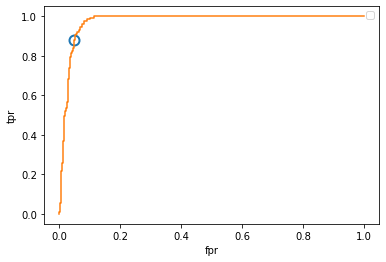

In [32]:
from sklearn.metrics import roc_curve

X, y = mglearn.datasets.make_blobs(n_samples=(4000,500), centers=2, cluster_std=[7.0, 2], random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

svc = SVC(probability=True)
svc.fit(X_train, y_train)

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test)) # 임계치 조금씩 바꿀때마다 어떻게 변하는지 보겠다. 실제값,예측값

idx = np.argmin(np.abs(thresholds)) # 0에 근접한 임계값 위치 찾기
plt.plot(fpr[idx], tpr[idx], marker='o', mew=2, markersize=10, fillstyle='none') # 동그라미

plt.plot(fpr, tpr) # 선
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.legend(loc='best')  # tpr, fpr은 같이 증가하는데 증가할 때 fpr 조금 증가하고 tpr 많이 증가하는 것이 최적점
plt.show() # roc curve(거꾸로 됨) # auc는 밑쪽임 # 회귀에선 사용하지만 분류에선 사용하지 x                                            

In [33]:
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_train, y_train)

print(lr.score(X_test, y_test)) # accuracy
print(svc.score(X_test, y_test)) # accuracy
print("*" * 50)
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])) # lr은 아직 안만들어서 svc로만! # 평균정밀도
print(roc_auc_score(y_test, svc.predict_proba(X_test)[:,1])) # 평균정밀도

0.8586666666666667
0.9422222222222222
**************************************************
0.9096319999999999
0.974588


In [34]:
digits=load_digits()
X, y = digits['data'], digits['target'] # y값은 9인지 확인 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [35]:
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
lr = LogisticRegression(max_iter=10000) # lr.score이 limit넘어가서 max_iter 줌
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))

0.9533333333333334


In [41]:
print(classification_report(y_test, lr.predict(X_test))) # 0은 0과 0이 아닌 것을 분류, 1은 1인것과 1이 아닌 것으로 분류...

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        45
           1       0.91      0.89      0.90        46
           2       1.00      0.98      0.99        44
           3       0.98      1.00      0.99        46
           4       0.96      1.00      0.98        45
           5       0.96      0.98      0.97        46
           6       0.98      0.98      0.98        45
           7       0.96      0.98      0.97        45
           8       0.82      0.84      0.83        43
           9       0.98      0.91      0.94        45

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [47]:
print(f1_score(y_test, lr.predict(X_test), average='weighted')) # weighted average
print(f1_score(y_test, lr.predict(X_test), average='macro')) 

0.9533309163774376
0.9528544497385683
0.9533333333333334


In [49]:
lr.decision_function(X_test)

array([[-2.54138491e+00,  7.50815825e+00, -7.06065440e+00, ...,
         1.23157764e+00,  1.04937907e+01, -1.17000834e+01],
       [ 1.58979819e+01, -1.37981447e+01,  3.66755792e+00, ...,
         2.03597367e+00,  3.32638189e+00, -1.79139131e+00],
       [ 2.15076491e+00, -1.11020080e+01,  5.43024204e-01, ...,
        -2.78005271e+00,  8.00458528e+00,  1.52034255e+01],
       ...,
       [-4.25988453e-01, -8.80662603e+00,  2.02672837e+00, ...,
         1.03932213e-02, -9.04742876e-01,  1.17031576e+01],
       [-4.82218194e+00,  1.40254423e+01, -1.99779046e+01, ...,
         1.36450808e+01, -9.24152827e-01, -2.20377581e+01],
       [-8.79210979e-01, -4.75579139e-01, -4.79596727e+00, ...,
        -3.05557253e-01,  1.35380062e+01, -1.47318381e+00]])

In [51]:
# 이진 분류일 경우 predict_proba, decision_function 결과 사용 가능
# 다중 분류일 경우 predict_proba만 사용 가능 + multi_class 분류 방식 지정 필수
# print(roc_auc_score(y_test, lr.decision_function(X_test), multi_class='ovr')) # 여긴 다중분류라 사용 불가
print(roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')) # roc auc curve : 0과 1 사이 매핑, ovr

0.9987809934152473


In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_test, y_test, scoring='accuracy') # default = accuracy
print(scores)
# cross_val_score에서 다중 분류일 경우 scoring은 'accuracy'만 지원
# scores = cross_val_score(lr, X_test, y_test, scoring='roc_auc') # 사용 불가
# print(scores)

[0.95555556 0.94444444 0.95555556 0.96666667 0.98888889]
